## imports

In [739]:
import numpy as np
import matplotlib.pyplot as plt
import lifetimes
%matplotlib widget

## Hazard function 

In [740]:
#Baseline 
def h0_Weibull(t, theta):
    (alpha, beta) = theta 
    h0 = beta / alpha * (t / alpha) ** (beta - 1)
    return h0

def H0_Weibull(t, theta):
    alpha, beta = theta 
    H0 = (t / alpha) ** beta
    return H0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
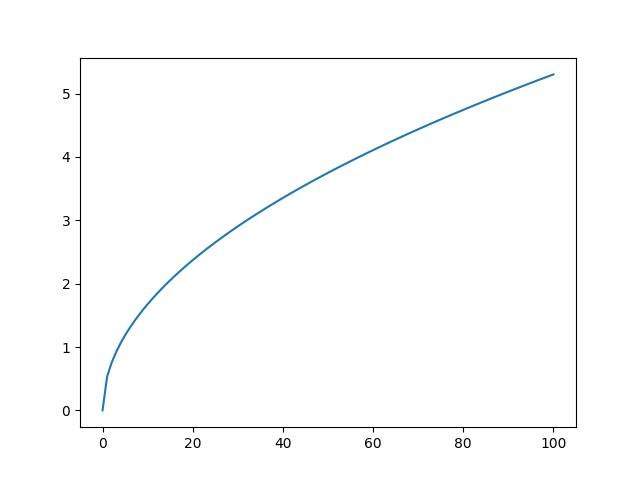

In [741]:
T = np.linspace(0, 100, 100)
theta = (2, 1.5)
y = [h0_Weibull(t, theta) for t in T]
plt.figure()
plt.plot(T,y)
plt.show()

In [742]:
def psi(x):
    return x**2 + x

In [743]:
# Hazard rate function with covariate 
# Weibull
def h_Weibull(t,theta,x):
    h_Weibull = h0_Weibull(t,theta)*np.exp(psi(x))
    return h_Weibull

def H_Weibull(t,theta,x):
    H_Weibull = H0_Weibull(t,theta)*np.exp(psi(x))
    return H_Weibull 

def survival_func_Weibull(t,theta,x):
    return np.exp(-H_Weibull(t,theta,x))

In [744]:
theta = (2, 1.5)

## Affichage d'exemples 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
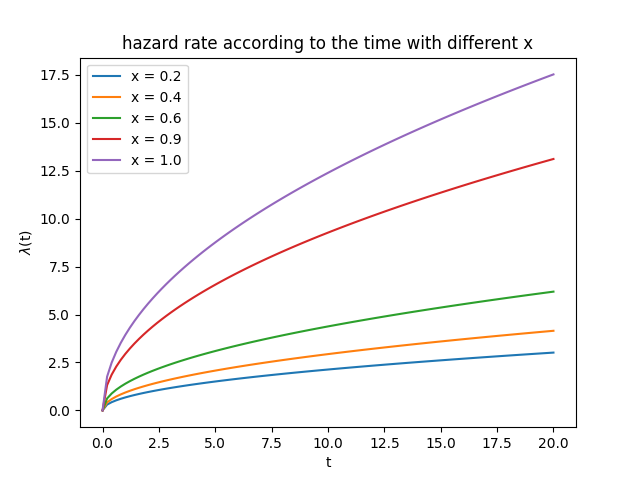

In [745]:
X = np.array([0.2, 0.4, 0.6, 0.9, 1])
T = np.linspace(0, 20, 100)
plt.figure()
for x in X : 
    y = [h_Weibull(t,theta,x) for t in T]
    plt.plot(T, y, label = 'x = '+str(x))
plt.legend()
plt.xlabel('t')
plt.ylabel('$\lambda$(t)')
plt.title('hazard rate according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
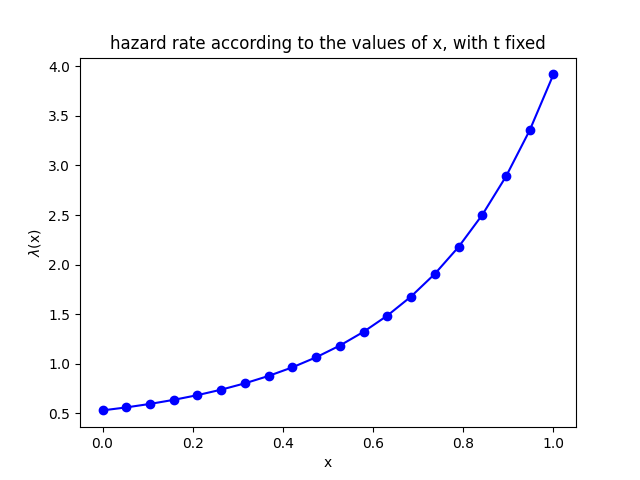

In [746]:
X = np.linspace(0, 1, 20)
t = 1.0
y = [h_Weibull(t, theta, x) for x in X]
plt.figure()
plt.plot(X,y, '-bo')
plt.xlabel('x')
plt.ylabel('$\lambda$(x)')
plt.title('hazard rate according to the values of x, with t fixed')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
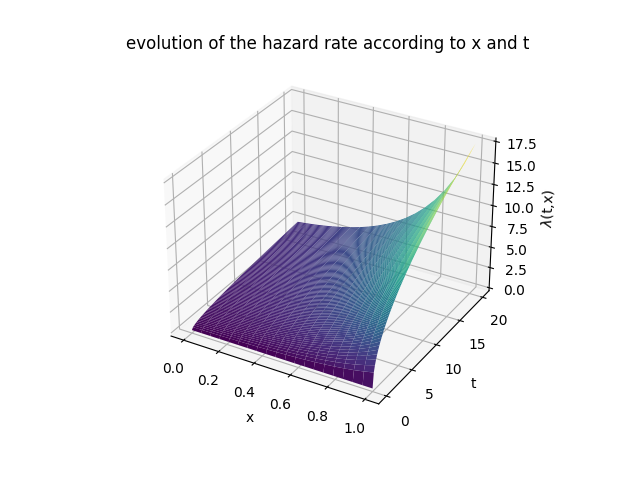

In [747]:
Xs = np.linspace(0, 1, 20)
Ts = np.linspace(0, 20, 100)
X, T = np.meshgrid(Xs, Ts)
h_val = h_Weibull(T, theta, X)
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, h_val, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('evolution of the hazard rate according to x and t');
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('$\lambda$(t,x)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
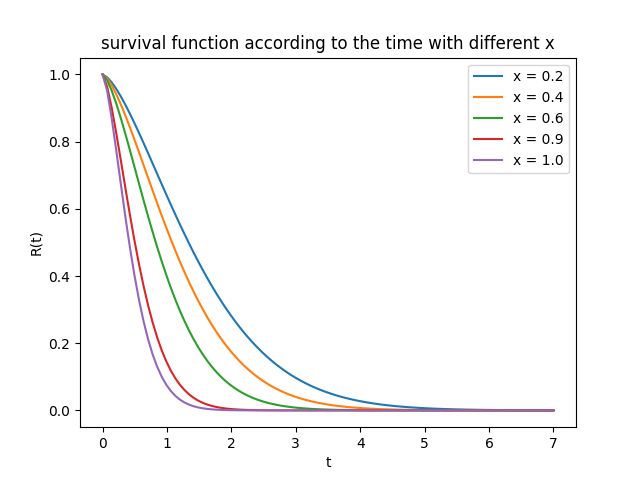

In [748]:
X = np.array([0.2, 0.4, 0.6, 0.9, 1])
T = np.linspace(0, 7, 100)
plt.figure()
for x in X : 
    y = [survival_func_Weibull(t,theta,x) for t in T]
    plt.plot(T, y, label = 'x = '+str(x))
plt.legend()
plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('survival function according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
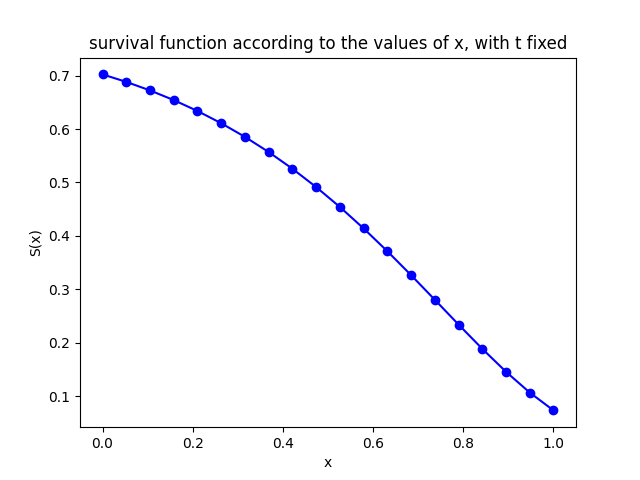

In [749]:
X = np.linspace(0, 1, 20)
t = 1.0
y = [survival_func_Weibull(t, theta, x) for x in X]
plt.figure()
plt.plot(X,y, '-bo')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.title('survival function according to the values of x, with t fixed')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
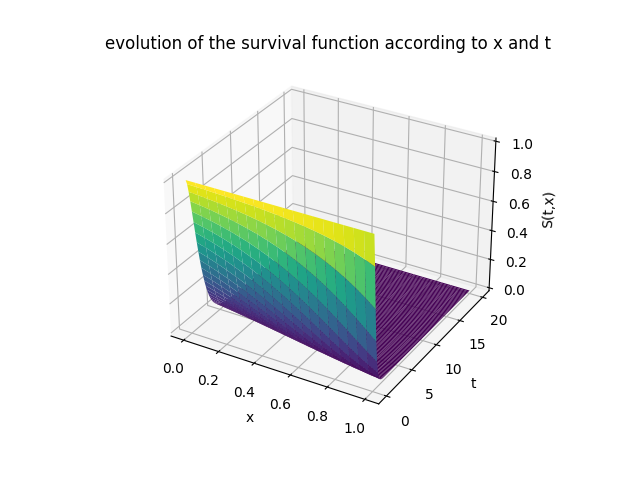

In [750]:
Xs = np.linspace(0, 1, 20)
Ts = np.linspace(0, 20, 100)
X, T = np.meshgrid(Xs, Ts)
S_val = survival_func_Weibull(T, theta, X)
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, S_val, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('evolution of the survival function according to x and t');
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('S(t,x)')
plt.show()

## Data generation 

In [751]:
# outputs :
# T : death times
# X : value of the covariable for each individual
# delta[i] : censure or not of i-th individual
def power_of_list(liste: list, power: float):
    l = []
    for i in liste:
        l.append(i ** power)
    return l


def invg(x, psi, theta=theta, n=100):
    alpha = theta[0]
    beta = theta[1]
    R = np.random.uniform(0, 1, n)
    l = (alpha * (-np.log(R) * np.exp(-psi(x))))
    liste = power_of_list(
        liste=l, power=(1 / beta)
    )
    return liste


def generate_data(x, n=100, theta=theta, psi=psi, pourcent_censure = 1):
    alpha = theta[0]
    beta = theta[1]
    T = invg(x, psi, theta=theta,n=n)
    X = x * np.ones(len(T))
    delta = [True for t in range(len(T))]
    return np.array(T), X, delta

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
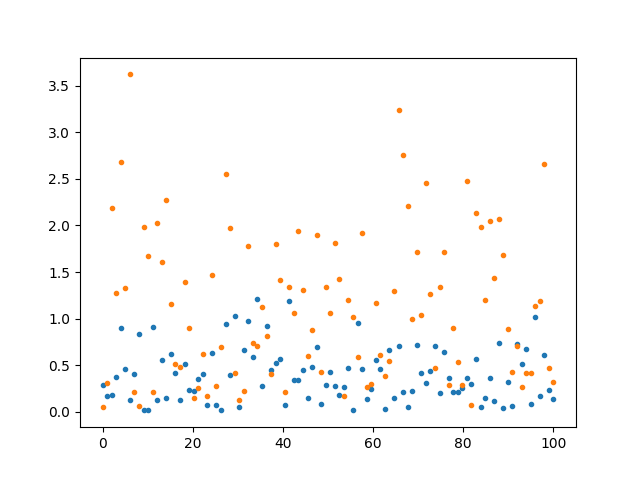

In [752]:
x1 = 1
T1, X1, delta1 = generate_data(x1, n=100)

x2 = 0.3
T2, X2, delta2 = generate_data(x2, n=100)

plt.figure()
plt.plot(np.linspace(0,100,100),T1,'.')
plt.plot(np.linspace(0,100,100),T2,'.')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
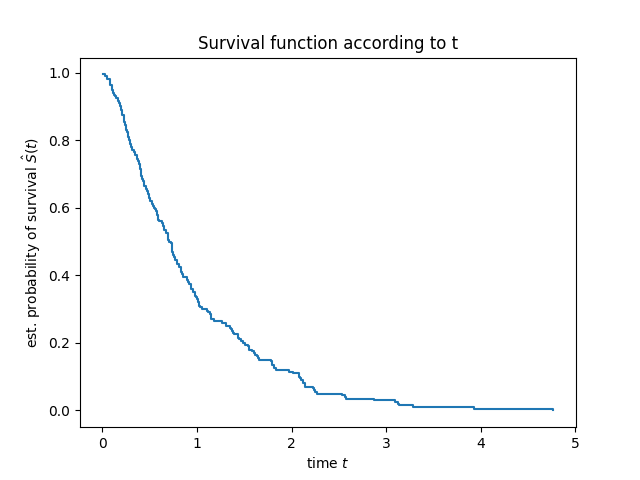

In [1010]:
T = []
X = []
delta = []
n = 200
x_values = np.random.uniform(0, 1, n)
pourcent_censure = 1 #PARAMETER OF CENSURE 
delta = np.zeros(n, 'bool')
delta[:int(pourcent_censure*n)] = int(1)
np.random.shuffle(delta)

for i in range(n):
    Ti, Xi, deltai = generate_data(x_values[i], n=1)
    T.append(Ti[0])
    X.append(Xi[0])
time1, survival_prob1 = kaplan_meier_estimator(delta, T)
plt.figure()
plt.step(time1, survival_prob1, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('Survival function according to t')
plt.show()

In [1137]:
pourcent_censure = 1 #PARAMETER OF CENSURE 
delta = np.zeros(n, 'bool')
delta[:int(pourcent_censure*n)] = int(1)
np.random.shuffle(delta)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
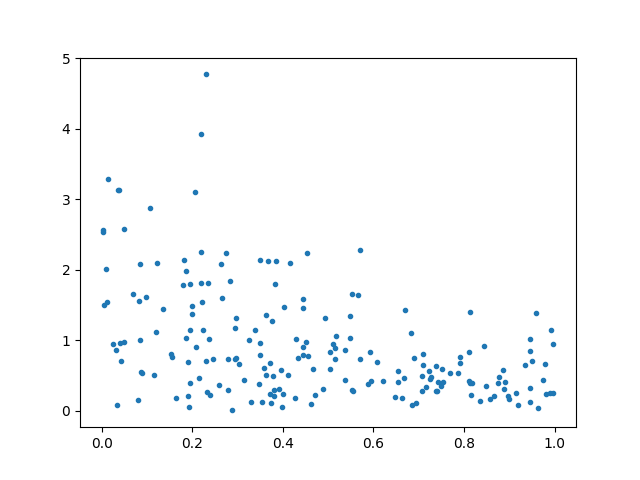

In [1138]:
plt.figure()
plt.plot(X, T, '.')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
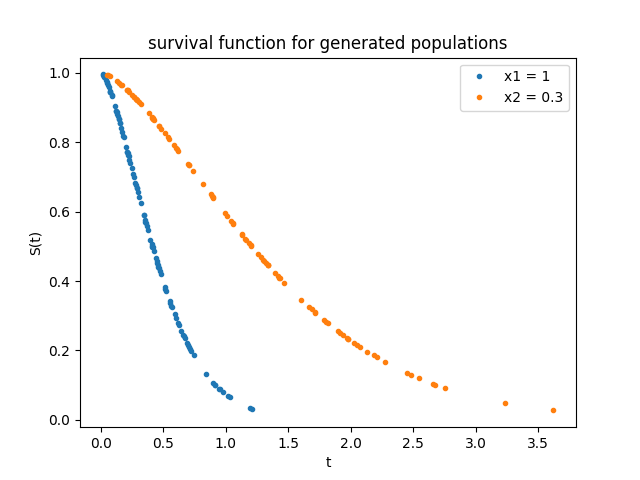

In [1139]:
# T_source = np.linspace(0, 1.2, 100)
plt.figure()
y = [survival_func_Weibull(t,theta,x1) for t in T1]
plt.plot(T1, y, '.', label = 'x1 = '+str(x1))

y = [survival_func_Weibull(t,theta,x2) for t in T2]
plt.plot(T2, y, '.', label = 'x2 = '+str(x2))
plt.legend()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('survival function for generated populations')
plt.show()

## Local likelihood approach 

In [1141]:
def K_gauss(u):
    return 1/np.sqrt(2*np.pi)*np.exp(-1/2*u**2)
    
def K_quad(u):
    if np.linalg.norm(u) <=1:
        to_return = 15/16*(1-u**2)**2
    else:
        to_return = 0
    return to_return

def K_cub(u):
    if np.linalg.norm(u) <=1:
        to_return = 35/32*(1-u**2)**3
    else:
        to_return = 0
    return to_return

def K_cos(u):
    if np.linalg.norm(u) <=1:
        to_return = 0.25*np.pi*np.cos(0.5*np.pi*u)
    else:
        to_return = 0
    return to_return

def K_uniform(u):
    if np.linalg.norm(u) <=1:
        to_return = 0.5
    else:
        to_return = 0
    return to_return

def K_triangle(u):
    if np.linalg.norm(u) <=1:
        to_return = (1-np.abs(u))
    else:
        to_return = 0
    return to_return

def K_epanechnikov(u):
    if np.linalg.norm(u) <=1:
        to_return = 3/4*(1-u**2)
    else:
        to_return = 0
    return to_return

def Kh(t, h=200 , kern='gauss'):
    '''
    :type kern: string
    :param kern: accepted string are : 
        -gaussien, gauss, 
        -quad, quadratique
        -cub, cubique
        -cos, cosine
        -epanechnikov, epa
        -triangle, tri
        -uniform, uni
    '''
    if kern=='gauss' or kern == 'gaussien':
        kernel = 1/h*K_gauss(t/h)
    elif kern=='quad' or kern == 'quadratique':
        kernel=K_quad(t/h)
    elif kern=='cub' or kern == 'quadratique':
        kernel = K_cub(t/h)
    elif kern=='cos' or kern == 'cosine':
        kernel = K_cos(t/h)
    elif kern=='epanechnikov' or kern == 'epa':
        kernel = K_epanechnikov(t/h)
    elif kern=='uniform' or kern == 'uni':
        kernel = K_uniform(t/h)
    elif kern=='triangle' or kern == 'tri':
        kernel = K_triangle(t/h)
    else:
        print("error of the kernel called please see the documentation")
        return 0
    return kernel

In [1142]:
x = X[0]
X_tilde_1 = np.array([[1, Xi-x] for Xi in X]) #first order
X_tilde_2 = np.array([[1, Xi-x, (Xi-x)**2] for Xi in X]) #second order
X_tilde_3 = np.array([[1, Xi-x, (Xi-x)**2, (Xi-x)**3] for Xi in X]) #second order

## log likelihood according to gamma and theta

### Implementation of the log likelihoods

In [1144]:
def l_gamma(gamma, params) : 
    X_tilde, T, delta, theta, str_kernel, h = params
    n=len(T)
    l = 0 
    for i in range(n):
        l += Kh(X_tilde[i][1], h=h, kern = str_kernel)*((np.log(h0_Weibull(T[i], theta)) + X_tilde[i].T@gamma)*delta[i] - H0_Weibull(T[i], theta)*np.exp(X_tilde[i].T@gamma))
    l *= 1/n
    return -l 

In [1145]:
def l_theta(theta, params) : 
    X_tilde, T, delta, gamma, str_kernel,h = params
    n=len(T)
    l = 0 
    for i in range(n):
        l += Kh(X_tilde[i][1], h=h, kern = str_kernel)*((np.log(h0_Weibull(T[i], theta)) + X_tilde[i].T@gamma)*delta[i] - H0_Weibull(T[i], theta)*np.exp(X_tilde[i].T@gamma))
    l *= 1/n
    return -l 

### Optimization 

### algorithm of estimation : 

#### For p = 1 : 

In [1146]:
eps = 1e-2 
theta_prec_0 = [1, 1]

kernels = ["gauss", "quad", "epa"]
hs = [2, 10]
X_tildes = [X_tilde_1, X_tilde_2, X_tilde_3]
gamma_prec = [x,1]

results=[]

for kernel in kernels :
    for h in hs :
        i = 0 #X_tilde_1 -> dim = 2
        theta_prec = theta_prec_0
        params_theta = [X_tildes[i], T, delta, gamma_prec, kernel, h]
        theta_opt = minimize(l_theta, theta_prec ,args = params_theta)
        theta_opt = theta_opt.x
        print(theta_opt)


        params_gamma = [X_tildes[i], T, delta, theta_opt, kernel, h]
        gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
        gamma_opt = gamma_opt.x
        print(gamma_opt)

        ite_max = 20
        ite=0
        while (np.linalg.norm(theta_opt - theta_prec) > eps or np.linalg.norm(gamma_opt - gamma_prec) > eps) and ite < ite_max:
            theta_prec = theta_opt
            gamma_prec = gamma_opt 

            params_theta = [X_tildes[i], T, delta, gamma_prec, kernel, h]
            theta_opt = minimize(l_theta, theta_prec ,args = params_theta)
            theta_opt = theta_opt.x
            print(theta_opt)

            params_gamma = [X_tildes[i], T, delta, theta_opt, kernel, h]
            gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
            gamma_opt = gamma_opt.x
            print(gamma_opt)
            ite +=1
        results+=[[theta_opt,gamma_opt]]

[2.32614533 1.26284204]
[-0.01395912  1.39759662]
[2.2823775  1.30396835]
[-0.03241492  1.45572506]
[2.27607289 1.3102313 ]
[-0.03515066  1.46448384]
[2.27318469 1.3134657 ]
[-0.03249385  1.45684937]
[2.27318469 1.3134657 ]
[-0.03249385  1.45684937]
[2.28489546 1.3001015 ]
[-0.03556586  1.46726471]
[2.28385724 1.30118898]
[-0.03600425  1.46880985]
[2.27352525 1.31419959]
[-0.03496747  1.46540872]
[2.27370442 1.31399661]
[-0.03497025  1.46539799]
[2.27880617 1.30760778]
[-0.03552477  1.46725628]
[2.27861938 1.30783427]
[-0.0355183   1.46726678]
[2.27338953 1.31445436]
[-0.03489908  1.46535141]
[2.27357001 1.31425511]
[-0.03489908  1.46535141]


#### For p = 2

In [1147]:
eps = 1e-2 
theta_prec_0 = [1, 1]

kernels = ["gauss", "quad", "epa"]
hs = [2, 10]
X_tildes = [X_tilde_1, X_tilde_2, X_tilde_3]
gamma_prec = [x,1, 1]

for kernel in kernels :
    for h in hs :
        i = 1 #X_tilde_2 -> dim = 3
        theta_prec = theta_prec_0
        params_theta = [X_tildes[i], T, delta, gamma_prec, kernel, h]
        theta_opt = minimize(l_theta, theta_prec ,args = params_theta)
        theta_opt = theta_opt.x
        print(theta_opt)


        params_gamma = [X_tildes[i], T, delta, theta_opt, kernel, h]
        gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
        gamma_opt = gamma_opt.x
        print(gamma_opt)

        ite_max = 20
        ite=0
        while (np.linalg.norm(theta_opt - theta_prec) > eps or np.linalg.norm(gamma_opt - gamma_prec) > eps) and ite < ite_max:
            theta_prec = theta_opt
            gamma_prec = gamma_opt 

            params_theta = [X_tildes[i], T, delta, gamma_prec, kernel, h]
            theta_opt = minimize(l_theta, theta_prec ,args = params_theta)
            theta_opt = theta_opt.x
            print(theta_opt)

            params_gamma = [X_tildes[i], T, delta, theta_opt, kernel, h]
            gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
            gamma_opt = gamma_opt.x
            print(gamma_opt)
            ite +=1
        results+=[[theta_opt,gamma_opt]]

[2.57435517 1.34395039]
[ 0.10867344  1.8322919  -0.41809038]
[2.61032079 1.31733743]
[ 0.12149379  1.78251026 -0.40160764]
[2.61604313 1.31327881]
[ 0.12321721  1.77862467 -0.40464746]
[2.61179133 1.31629505]
[ 0.12149379  1.78251026 -0.40160764]
[2.61179133 1.31629505]
[ 0.12149379  1.78251026 -0.40160764]
[2.62899881 1.30372167]
[ 0.13091596  1.69654683 -0.30282015]
[2.63105349 1.30223979]
[ 0.1314844   1.69518201 -0.3038796 ]
[2.61436708 1.31453238]
[ 0.12187047  1.7956405  -0.42632442]
[2.61330768 1.3152846 ]
[ 0.12161464  1.79617679 -0.4258878 ]
[2.62157886 1.30939567]
[ 0.12649001  1.74622763 -0.36480426]
[2.6221982  1.30895507]
[ 0.12668511  1.74571451 -0.36520267]
[2.61368353 1.31513895]
[ 0.12163346  1.79765606 -0.42821114]
[2.61299666 1.31559728]
[ 0.12147225  1.79802923 -0.4279428 ]


#### For p = 3 : 

In [1148]:
eps = 1e-2 
theta_prec_0 = [1, 1]

kernels = ["gauss", "quad", "epa"]
hs = [2, 10]
X_tildes = [X_tilde_1, X_tilde_2, X_tilde_3]
gamma_prec = [x,1, 1, 1]

for kernel in kernels :
    for h in hs :
        i = 2 #X_tilde_3 -> dim = 4
        theta_prec = theta_prec_0
        params_theta = [X_tildes[i], T, delta, gamma_prec, kernel, h]
        theta_opt = minimize(l_theta, theta_prec ,args = params_theta)
        theta_opt = theta_opt.x
        print(theta_opt)


        params_gamma = [X_tildes[i], T, delta, theta_opt, kernel, h]
        gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
        gamma_opt = gamma_opt.x
        print(gamma_opt)

        ite_max = 20
        ite=0
        while (np.linalg.norm(theta_opt - theta_prec) > eps or np.linalg.norm(gamma_opt - gamma_prec) > eps) and ite < ite_max:
            theta_prec = theta_opt
            gamma_prec = gamma_opt 

            params_theta = [X_tildes[i], T, delta, gamma_prec, kernel, h]
            theta_opt = minimize(l_theta, theta_prec ,args = params_theta)
            theta_opt = theta_opt.x
            print(theta_opt)

            params_gamma = [X_tildes[i], T, delta, theta_opt, kernel, h]
            gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
            gamma_opt = gamma_opt.x
            print(gamma_opt)
            ite +=1
        results+=[[theta_opt,gamma_opt]]

[2.78137694 1.42221844]
[ 0.2256117   0.94281886  3.89624588 -3.83134021]
[2.92020426 1.33749664]
[ 0.26824236  0.79986067  3.88202603 -3.77850683]
[2.94551897 1.32370192]
[ 0.27494127  0.92941316  3.28684366 -3.26758097]
[2.95114029 1.32065433]
[ 0.2760907   0.92695061  3.28534036 -3.26864554]
[2.94576729 1.3234696 ]
[ 0.27494127  0.92941316  3.28684366 -3.26758097]
[2.94576729 1.3234696 ]
[ 0.27494127  0.92941316  3.28684366 -3.26758097]
[2.96844932 1.31107271]
[ 0.28373871  0.98941214  2.86282796 -2.85333787]
[2.97346987 1.30836388]
[ 0.28471598  0.98728363  2.86134295 -2.85442177]
[2.9506987  1.32048685]
[ 0.27590149  0.89561574  3.40725239 -3.37272149]
[2.94616952 1.32288642]
[ 0.27497321  0.89739652  3.40845868 -3.37183465]
[2.95719765 1.31699584]
[ 0.27904484  0.94683969  3.13299559 -3.1154031 ]
[2.95908764 1.31595847]
[ 0.27942004  0.94600878  3.13250977 -3.11574818]
[2.94750117 1.32209576]
[ 0.27499208  0.89467515  3.4230104  -3.38742197]
[2.94507006 1.32340005]
[ 0.27449848  

### Results of this approach ranked by p

###  p = 1: 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
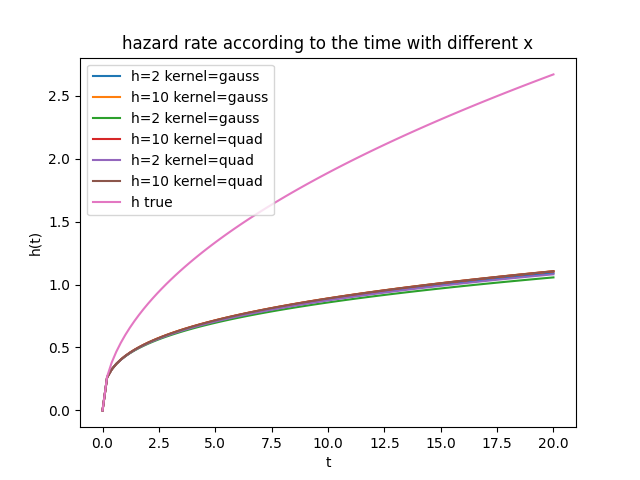

In [1149]:
time = np.linspace(0, 20, 100)
plt.figure()
y_true = np.array([h_Weibull(t,theta,x) for t in time])
y_hat = []
for i in range(6):
    y_hat = np.array([h0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
    plt.plot(time, y_hat, label = 'h=' + str(hs[i%2])+' kernel='+kernels[i//3])
    
plt.plot(time, y_true, label = 'h true')
plt.legend()
plt.xlabel('t')
plt.ylabel('h(t)')
plt.title('hazard rate according to the time with different x')
plt.show()

### Evaluation of the errors

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
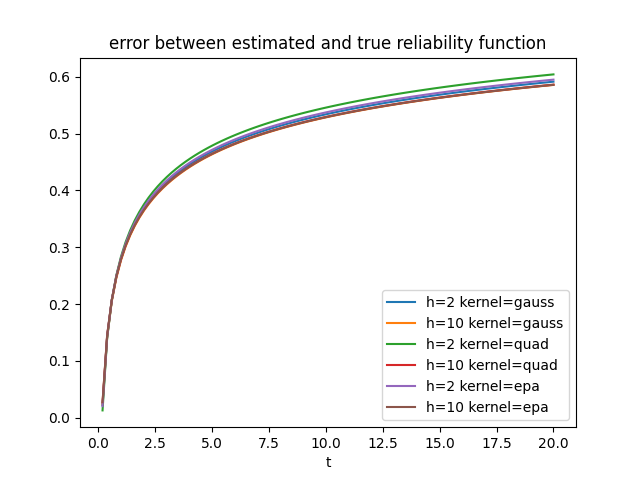

In [1150]:
plt.figure()
y_hat=[]
for i in range(6):
    y_hat = np.array([h0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
    plt.plot(time[1:],(abs(y_hat[1:] - y_true[1:]))/y_true[1:], label = 'h=' + str(hs[i%2])+' kernel='+kernels[i//2])
plt.title('error between estimated and true reliability function')
plt.xlabel('error')
plt.xlabel('t')
plt.legend()
plt.show()

In [1151]:
for i in range(6):
    y_hat = np.array([h0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
    print('error for h=' + str(hs[i%2])+' and kernel='+kernels[i//2]+' : ',np.linalg.norm((abs(y_hat[1:] - y_true[1:]))/y_true[1:]))

error for h=2 and kernel=gauss :  5.082110368577857
error for h=10 and kernel=gauss :  5.030756691746443
error for h=2 and kernel=quad :  5.191856551109402
error for h=10 and kernel=quad :  5.038739562420522
error for h=2 and kernel=epa :  5.113432903292607
error for h=10 and kernel=epa :  5.035545354270369


### p = 2

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
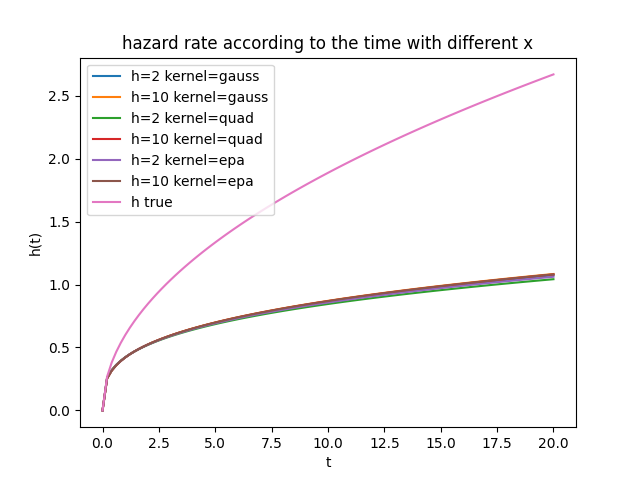

In [1152]:
time = np.linspace(0, 20, 100)
plt.figure()
y_true = np.array([h_Weibull(t,theta,x) for t in time])
y_hat = []
for i in range(6, 12):
    y_hat = np.array([h0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
    plt.plot(time, y_hat, label = 'h=' + str(hs[i%2])+' kernel='+kernels[(i-6)//2])
    
plt.plot(time, y_true, label = 'h true')
plt.legend()
plt.xlabel('t')
plt.ylabel('h(t)')
plt.title('hazard rate according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
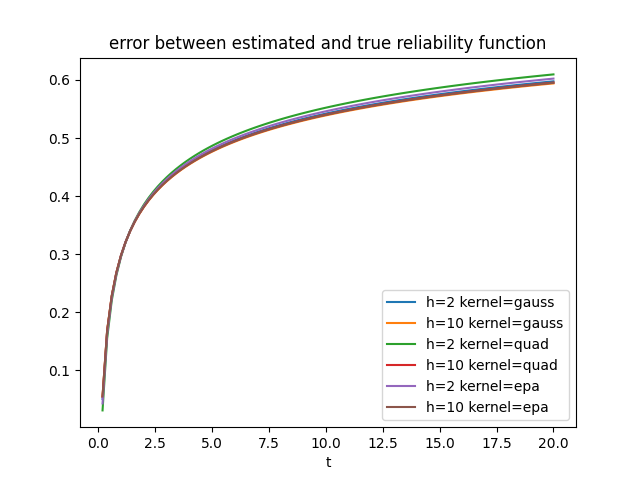

In [1153]:
plt.figure()
y_hat=[]
for i in range(6,12):
    y_hat = np.array([h0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
    plt.plot(time[1:],(abs(y_hat[1:] - y_true[1:]))/y_true[1:], label = 'h=' + str(hs[i%2])+' kernel='+kernels[(i-6)//2])
plt.title('error between estimated and true reliability function')
plt.xlabel('error')
plt.xlabel('t')
plt.legend()
plt.show()

In [1154]:
for i in range(6,12):
    y_hat = np.array([h0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
    print('error for h=' + str(hs[i%2])+' and kernel='+kernels[(i-6)//2]+' : ',np.linalg.norm((abs(y_hat[1:] - y_true[1:]))/y_true[1:]))

error for h=2 and kernel=gauss :  5.166769032145413
error for h=10 and kernel=gauss :  5.138505209752305
error for h=2 and kernel=quad :  5.258268937734524
error for h=10 and kernel=quad :  5.150324904958338
error for h=2 and kernel=epa :  5.2024783408648005
error for h=10 and kernel=epa :  5.14752597109203


### p = 3 : 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
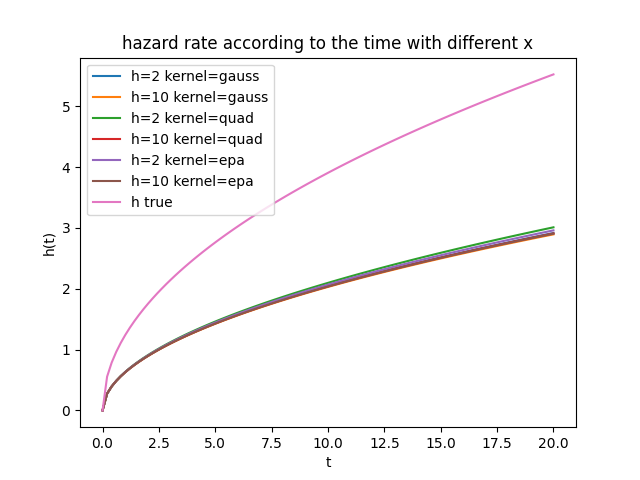

In [1006]:
time = np.linspace(0, 20, 100)
plt.figure()
y_true = np.array([h_Weibull(t,theta,x) for t in time])
y_hat = []
for i in range(12, 18):
    y_hat = np.array([h0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
    plt.plot(time, y_hat, label = 'h=' + str(hs[i%2])+' kernel='+kernels[(i-12)//2])
    
plt.plot(time, y_true, label = 'h true')
plt.legend()
plt.xlabel('t')
plt.ylabel('h(t)')
plt.title('hazard rate according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
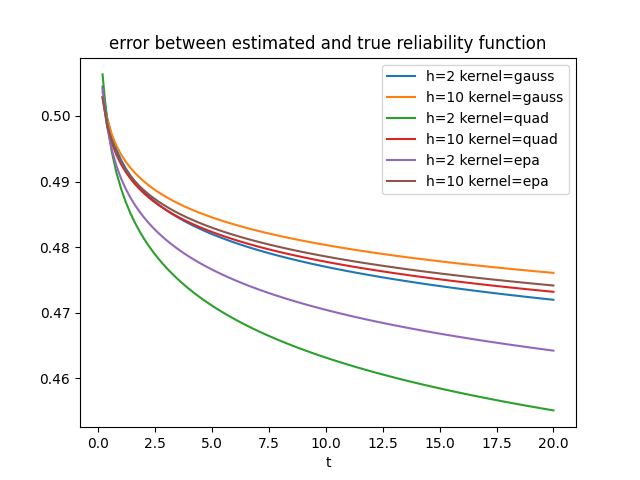

In [1007]:
plt.figure()
y_hat=[]
for i in range(12,18):
    y_hat = np.array([h0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
    plt.plot(time[1:],(abs(y_hat[1:] - y_true[1:]))/y_true[1:], label = 'h=' + str(hs[i%2])+' kernel='+kernels[(i-12)//2])
plt.title('error between estimated and true reliability function')
plt.xlabel('error')
plt.xlabel('t')
plt.legend()
plt.show()

In [1008]:
for i in range(12,18):
    y_hat = np.array([h0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
    print('error for h=' + str(hs[i%2])+' and kernel='+kernels[(i-12)//2]+' : ',np.linalg.norm((abs(y_hat[1:] - y_true[1:]))/y_true[1:]))

error for h=2 and kernel=gauss :  4.7658747445087295
error for h=10 and kernel=gauss :  4.795844060603549
error for h=2 and kernel=quad :  4.639849342196296
error for h=10 and kernel=quad :  4.771723799420702
error for h=2 and kernel=epa :  4.70517217617918
error for h=10 and kernel=epa :  4.7791512246058785


### Application to the data set NCCTG 

In [1163]:
import pandas as pd 

data = pd.read_csv('cancer.csv')
data.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


## Test for the effect of age 

In [1189]:
X_age = data['age']/np.max(data['age'])
T_data = data['time']
delta_data = np.array(data['status'] - 1, dtype = 'bool')

### definition of the neighborhood

In [1175]:
x_age = X_age[0]
X_tilde_age = np.array([[1, Xi_age-x_age, (Xi_age-x_age)**2] for Xi_age in X_age]) #second order

### Optimization algorithm 

In [1198]:
eps = 1e-2 
theta_prec_0 = [1, 1]

gamma_prec = [x_age,1, 1]
kernel = "quad"
h = 10

theta_prec = theta_prec_0

params_theta = [X_tilde_age, T_data, delta_data, gamma_prec, kernel, h]
theta_opt = minimize(l_theta, theta_prec ,args = params_theta)
theta_opt = theta_opt.x
print(theta_opt)


params_gamma = [X_tilde_age, T_data, delta_data, theta_opt, kernel, h]
gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
gamma_opt = gamma_opt.x
print(gamma_opt)

ite_max = 20
ite=0
while (np.linalg.norm(theta_opt - theta_prec) > eps or np.linalg.norm(gamma_opt - gamma_prec) > eps) and ite < ite_max:
    theta_prec = theta_opt
    gamma_prec = gamma_opt 

    params_theta = [X_tilde_age, T_data, delta_data, gamma_prec, kernel, h]
    theta_opt = minimize(l_theta, theta_prec ,args = params_theta)
    theta_opt = theta_opt.x
    print(theta_opt)

    params_gamma = [X_tilde_age, T_data, delta_data, theta_opt, kernel, h]
    gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
    gamma_opt = gamma_opt.x
    print(gamma_opt)
    ite +=1
results =[[theta_opt,gamma_opt]]

[761.68225834   1.31756417]
[1.02812729 2.28073389 2.60864824]
[761.68225731   1.31898476]
[1.02894767 2.28062466 2.60867077]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
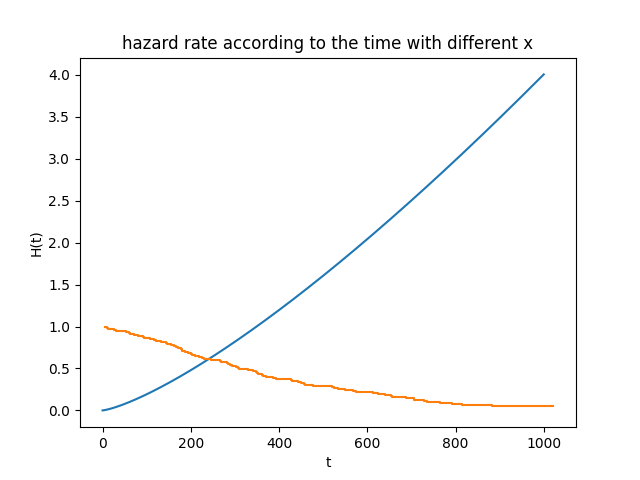

In [1199]:
time = np.linspace(0, 1000, 2000)
plt.figure()
y_hat = []
y_hat = np.array([H0_Weibull(t,results[i][0])*np.exp(results[i][1][0]) for t in time])
plt.plot(time, y_hat)
time1, survival_prob1 = kaplan_meier_estimator(delta_data, T_data)
plt.step(time1, survival_prob1, where="post")
plt.xlabel('t')
plt.ylabel('H(t)')
plt.title('hazard rate according to the time with different x')
plt.show()